In the document entitled **a first glance**, I tried to re-discover some correlations between *doctor's office waiting time* and *race/ethnicity*. Although I didn't do any statistics (yet), it looked like there was a relationship between the variables. 

Today I'm going to see how race/ethnicity correlate to the `ACC_USHURRY` or `ACC_USEXPPRB` or `ACC_USDISCUS` variables, which represent "Doctor seems to be in a hurry," "Doctor doesn't explain medical problems," and "[Health problems should] be discussed but are not."

The values are encoded in this way:

     .='Missing'
     1='1:Strongly Agree'
     2='2:Agree'
     3='3:Disagree'
     4='4:Strongly Disagree'
     5='5:No experience'
    -7='-7:Refused'
    -8="-8:Don't know"
    -9='-9:Not ascertained'

In [1]:
from IPython.display import display_pretty
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [20]:
mcbs_datafile = os.path.join(os.getcwd(), '..', 'data', 'ATCPUF13.csv')
df = pd.read_csv(mcbs_datafile)

# create race dict for conversion
racefmt = {1:'White',
           2:'Black',
           3:'Hispanic',
           4:'Other'}


race = df.IV_RACE.replace(racefmt)

# we only keep values 1-4 for the "agree" format
hurry = df.ACC_USHURRY
explain = df.ACC_USEXPPRB
discuss =df.ACC_USDISCUS

# construct access-to-care DataFrame
access_df = pd.DataFrame({'race': race,
                          'hurry': hurry,
                          'explain': explain,
                          'discuss': discuss})

In [21]:
# clean out all values where discuss/explain/hurry are not 1-4
access_df = access_df[((access_df.hurry <= 4) | (access_df.hurry >= 1)) &
                      ((access_df.explain <= 4) | (access_df.explain >= 1)) &
                      ((access_df.discuss <= 4) | (access_df.discuss >= 1))]

print(access_df.sample(10))

       discuss  explain  hurry   race
1687       3.0      3.0    4.0  White
4279       4.0      4.0    4.0  White
13389      3.0      3.0    4.0  White
2898       4.0      2.0    3.0  White
13858      3.0      3.0    3.0  Black
8485       2.0      2.0    2.0  White
9306       4.0      3.0    4.0  Other
3639       3.0      3.0    3.0  Black
10126      3.0      3.0    3.0  White
7219       3.0      3.0    3.0  White


KeyboardInterrupt: 

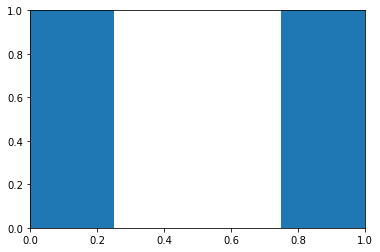

In [23]:
access_df['hurry'].plot(kind='bar')